In [1]:
from sklearn import tree
from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from preprocess import file_to_feature_vector

In [2]:
# automatically reload imported files when they change
%load_ext autoreload
%autoreload 1

In [3]:
# deterministic, it seems
files = load_files('./avatars', load_content=False)

In [4]:
files.keys()

dict_keys(['filenames', 'target_names', 'target', 'DESCR'])

In [5]:
# labels
files["filenames"][0:5], files["target_names"], files["target"][0:10]

(array(['./avatars/custom/emmas.png', './avatars/default/saxe.png',
        './avatars/default/cava.png', './avatars/default/awner.png',
        './avatars/default/sophs.png'], dtype='<U27'),
 ['custom', 'default'],
 array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1]))

In [8]:
# folder names
files["target_names"]

['custom', 'default']

In [9]:
examples = [file_to_feature_vector(path) for path in files["filenames"]]

examples

[[0, 210],
 [166, 2],
 [132, 2],
 [120, 2],
 [160, 2],
 [138, 2],
 [0, 154],
 [108, 2],
 [0, 250],
 [132, 2],
 [0, 58],
 [72, 2],
 [178, 2],
 [162, 2],
 [0, 54],
 [0, 55],
 [0, 210],
 [180, 2],
 [0, 255],
 [1, 103],
 [160, 2],
 [130, 2],
 [0, 255],
 [106, 2],
 [0, 252],
 [184, 2],
 [192, 2],
 [154, 2],
 [154, 2],
 [0, 1],
 [0, 250],
 [0, 255],
 [192, 2],
 [162, 2],
 [0, 242],
 [126, 2],
 [130, 2],
 [0, 223],
 [0, 243],
 [192, 2],
 [150, 2],
 [0, 12],
 [0, 254],
 [144, 2],
 [156, 2],
 [0, 146],
 [0, 254],
 [0, 245],
 [148, 2],
 [142, 2],
 [0, 218],
 [174, 2],
 [166, 2],
 [166, 2],
 [126, 2],
 [0, 205],
 [0, 149],
 [180, 2],
 [1, 47],
 [0, 7],
 [180, 2],
 [114, 2],
 [150, 2],
 [0, 236],
 [162, 2],
 [138, 2],
 [0, 253],
 [124, 2],
 [0, 243],
 [0, 225],
 [168, 2],
 [84, 2],
 [174, 2],
 [208, 2],
 [154, 2],
 [154, 2],
 [84, 2],
 [0, 64],
 [0, 242],
 [106, 2],
 [184, 2],
 [0, 171],
 [196, 2],
 [142, 2],
 [154, 2],
 [2, 231],
 [0, 53],
 [0, 216],
 [148, 2],
 [120, 2],
 [0, 221],
 [0, 253],
 [

In [10]:
# split our examples and labels into a "training" set and a "validation" set
# use part of our dataset as a "holdout set" during training to get a sense of how it will work on real images

# (sometimes there's a "test" set that's used when you're developing the model to avoid overoptimizing 
# for the validation set, but we're not using it.)

# we'll use half as training, half as validation

# TODO: considering balancing these sets so they have an equal number of default and custom avatars

training_set = examples[0:len(examples)//2]
validation_set = examples[len(examples)//2:]

labels = files["target"]
training_labels = labels[0:len(labels)//2]
validation_labels = labels[len(labels)//2:]

[len(training_set), len(validation_set), len(training_labels), len(validation_labels)]


[100, 100, 100, 100]

[Text(167.4, 163.07999999999998, 'X[0] <= 37.0\ngini = 0.48\nsamples = 100\nvalue = [40, 60]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 60\nvalue = [0, 60]')]

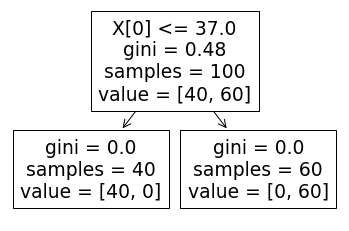

In [11]:
# find the feature and the threshold that best splits this into two classes

# go through all the examples. for all of the two features we have.

# Try a threshold until it finds a value that most cleanly splits the data.

# start with a simple decision tree
# looks at all the data, finds the split that makes one group have most of one label, and another
# group have most of another label

# (if that is the most discriminating feature that can split that feature into two, it picks that feature))

# find the feature that splits it most coherently into two groups
# then find the second-most splitting feature

clf = tree.DecisionTreeClassifier()
clf = clf.fit(training_set, training_labels)
tree.plot_tree(clf)

In [12]:
# gini coefficient: goodness measure of how coherent the two groups are (zero is perfect, one (or 0.5?) is useless)
# it's what the decision tree uses to determine how to split

# throw all of the validation examples through the tree and see which nodes they end up with
prediction = clf.predict(validation_set[:1])[0]
prediction

1

In [13]:
predictions = clf.predict(validation_set)
predictions

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [14]:
# indices of avatars that are actually defaults but are classified as custom

# single &: elementwise boolean AND of vectors of matrices

# 1: default
# 0: custom

false_customs = np.where((predictions != validation_labels)&(validation_labels == 1))[0]
false_customs

array([], dtype=int64)

In [15]:
# indices of avatars that are actually customs but are classified as defaults
# 1: default
# 0: custom

false_defaults = np.where((predictions != validation_labels)&(validation_labels == 0))[0]
false_defaults

array([], dtype=int64)

In [16]:
# what's our accuracy?
np.mean(np.equal(predictions, validation_labels))

1.0

In [17]:
# try it out on a custom avatar
feature_vector = file_to_feature_vector("smoke-tests/andreasjansson.png")
prediction = clf.predict([feature_vector])[0]
prediction

0

In [18]:
# try it out on a default avatar
feature_vector = file_to_feature_vector("smoke-tests/default.png")
prediction = clf.predict([feature_vector])[0]
prediction

1

In [19]:
# pickle the classifier! 🥒

import joblib
joblib.dump(clf, 'model.pkl', compress=9)

['model.pkl']